In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from numpy import mean
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from statsmodels.stats.outliers_influence import variance_inflation_factor

import random
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3, shuffle=True, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
import random
from scipy import stats
from sklearn.metrics import classification_report

B = 5
m, n = X_train.shape
boostrap_ratio = 1
tree_params = {'max_depth': 2, 'criterion':'gini', 'min_samples_split': 5}
models = [DecisionTreeClassifier(**tree_params) for _ in range(B)]

#sample size for each tree
sample_size = int(boostrap_ratio * len(X_train))

xsamples = np.zeros((B, sample_size, n))
ysamples = np.zeros((B, sample_size))

#subsamples for each model
for i in range(B):
    ##sampling with replacement; i.e., sample can occur more than once
    #for the same predictor
    for j in range(sample_size):
        idx = random.randrange(m)   #<----with replacement #change so no repetition
        xsamples[i, j, :] = X_train[idx]
        ysamples[i, j] = y_train[idx]
        #keep track of idx that i did not use for ith tree

#fitting each estimator
for i, model in enumerate(models):
    _X = xsamples[i, :]
    _y = ysamples[i, :]
    model.fit(_X, _y)
    
#make prediction and return the probabilities
predictions = np.zeros((B, X_test.shape[0]))
for i, model in enumerate(models):
    yhat = model.predict(X_test)
    predictions[i, :] = yhat
    
#predictions.shape = (B, m_test)
    
yhat = stats.mode(predictions)[0][0] #the first zero gives us the mode array, the second zero convert from 2D ([[]]) to 1D ([])

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [10, 50, 100], 
              "criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 10)}
model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid, refit=True)
grid.fit(X_train, y_train)

print(grid.best_params_)

yhat = grid.predict(X_test)

print(classification_report(y_test, yhat))

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Random Forest Lecture

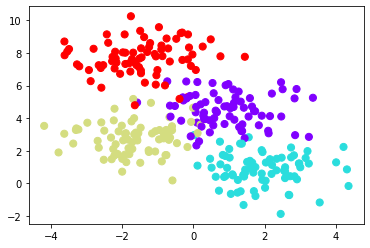

In [13]:
X, y = make_blobs(n_samples = 300,centers = 4, random_state = 0,cluster_std = 1.0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'rainbow')

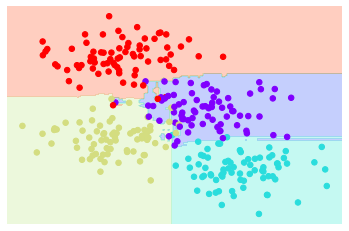

In [14]:
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1],c=y, s=30,cmap = cmap,
    clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim,num=200),

    np.linspace(*ylim,num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy,Z,alpha=0.3, 
                        levels=np.arange(n_classes + 1) -0.5,
                        cmap=cmap,clim=(y.min(), y.max()),
                        zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)

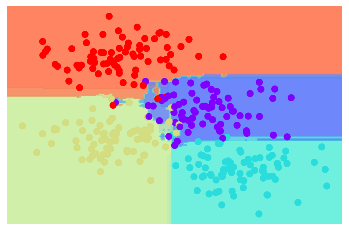

In [15]:
for max in [2, 4, 20, 100]:
    model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth = max)
    visualize_classifier(model, X, y)

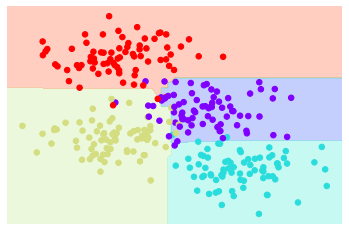

In [16]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split = 10)
visualize_classifier(model, X, y)

## Random Forest with the Diabetes Dataset

In [25]:
df = pd.read_csv('../data/simpredm.csv')
# print(df)
df['sex'] = df['sex'].map({'Male':1, 'Female':0})
df['dm'] = df['dm'].map({'yes':1, 'no':0})
# print(df)
X = np.array(df)
# print(X)
y_temp = X[:,6]
X_temp = X[:,0:6]

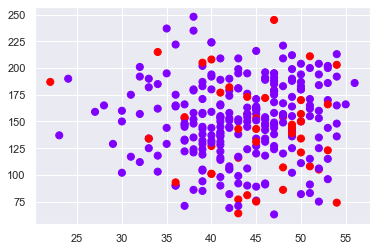

In [26]:
np.random.seed(415)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
plt.scatter(X_train[:,0], X_train[:,3],c=y_train, s=50,cmap='rainbow');

In [31]:
model = RandomForestClassifier(n_estimators = 100, random_state = 4, oob_score = True, max_features = 4)
forest = model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_pred = forest.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n',confusion)

TP = confusion[1,1]
#True Negatives
TN = confusion[0,0]
#False Positives
FP = confusion[0,1]
#False Negatives
FN = confusion[1,0]
print('accuracy: ', (TP + TN) / float(TP + TN + FP + FN))
print('sensitivity: ',TP / float(TP + FN))
print('specificity: ',TN / float(TN + FP))

target_names = ['DM', 'Healthy']
print(classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix : 
 [[107   7]
 [ 17  10]]
accuracy:  0.8297872340425532
sensitivity:  0.37037037037037035
specificity:  0.9385964912280702
              precision    recall  f1-score   support

          DM       0.86      0.94      0.90       114
     Healthy       0.59      0.37      0.45        27

    accuracy                           0.83       141
   macro avg       0.73      0.65      0.68       141
weighted avg       0.81      0.83      0.81       141



## Random Forest for Classifying Digits Image

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.95      0.97        58
           2       1.00      1.00      1.00        52
           3       0.95      0.98      0.96        54
           4       1.00      0.97      0.98        66
           5       0.96      0.96      0.96        73
           6       0.98      0.98      0.98        57
           7       0.98      0.98      0.98        62
           8       0.94      0.96      0.95        51
           9       0.96      0.97      0.96        67

    accuracy                           0.97       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.97      0.97       594



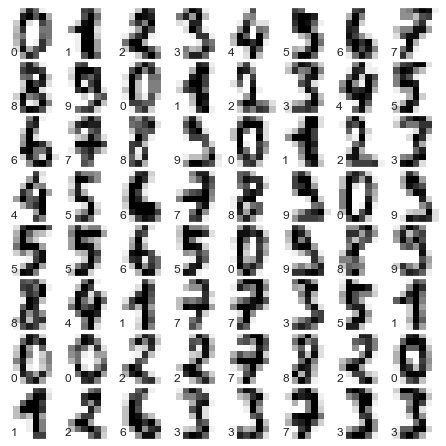

In [20]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()
np.random.seed(415)

fig = plt.figure(figsize=(6,6)) #figuresizeininches
fig.subplots_adjust(left=0, right=1,bottom=0, top=1,hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0,7, str(digits.target[i]))


Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)
model = RandomForestClassifier(n_estimators = 1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print(classification_report(ypred, ytest))

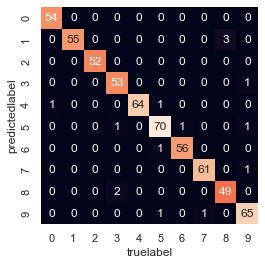

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('truelabel')
plt.ylabel('predictedlabel');